# **Project 1 - Statistical Inference**
In the recent [report of the World Health Organization](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death) in 2020, 
Diabetes has entered the top 10 causes of death worldwide in the year 2019. It ranked 9th overall and cause over 1.5 million deaths worldwide. 
Until now, there is no know cure for diabetes however there are some ways to prevent or delay the onset of this disease. With this, we decided 
to explore and analyze a dataset that focuses on a survey regarding diabetes. 

---

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# 1. Diabetes Health Indicators Dataset

This dataset is based from the annual landline and cellphone health related survey conducted by Centers for Disease Control and Prevention (CDC) called The Behavioral Risk Factor Surveillance System (BRFSS). This survey collects data for over 400,000 U.S. residents regarding their health conditions, health-related behaviours and preventive services available to them. Originally, the survey was conducted through telephone and cellphone but with the emerging changes in culture and technology they also incorporated additional methods in collecting data. This includes conducting the survey online and by sending a packaged that includes a paper version of the survey. For more information regarding the data colletction and research results you can visit the [BRFSS Web site](https://www.openintro.org/redirect.php?go=cdc_data_brfss&referrer=data_set_page).

Originally, we planned to used the original dataset from BRFSS but since it consist of mroe than 400,000 observations and 330 variables the notebook can't handle the size of the dataset. The dataset we used called [Diabetes Health Indicators Dataset](https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset?select=diabetes_012_health_indicators_BRFSS2015.csv) is a cleaned dataset based from the 2015 BRFSS survey available in Kaggle. The process for the data cleaning is available in this [notebook](https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset-notebook). This dataset is composed of 253,680 responses which primarily focuses on data regarding diabetes and its health indicators. There are 22 variables including the target variable diabetes. This sample is composed of randomly selected U.S. residents from each state by using random digit dialing sampling. This sampling method includes unlisted respondents in the phone book. Thus our conclusion and insight would only be applicable to U.S. residents.

The first 5 observations of the dateset is shown below along with some information regarding the about the dataset.

In [67]:
# Generating the first 5 observations of the dataset

diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Generating information regarding the dataset

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## 1.1. Observations
The row in this dataset represent the observation. Each observation is a response from the The Behavioral Risk Factor Surveillance System (BRFSS) which is a health-related telephone survey that is collected annually by the CDC. A total of 253,680 responses of U.S. residents from different states was recorded.

## 1.2. Description of the Variables
A total of 22 variables was recorded in this dataset. These variables includes our target variable which is diabetes (whether the respondetns has a diabets, prediabets or none), respondent's health-related risk behaviors, and health indicators. Note that since the survey was primarily through landline and cellphone, its easier to record using numbers. Thus, each categorical data was represented using integers in the dateset. The description for the variables used was explained below. 

- **`Diabetes_012`**: Diabetic status of the respondent
    - 0 - No diabetes 
    - 1 - Prediabetes 
    - 2 - Diabetes
- **`HighBP`**: Respondent's blood pressure level told by a doctor, nurse, or other health professional
    - 0 - No high BP 
    - 1 - High BP
- **`HighChol`**: Respondent's cholesterol level told by a doctor, nurse, or other health professional
    - 0 - No high cholesterol 
    - 1 - High cholesterol
- **`CholCheck`**: Cholesterol check within 5 years
    - 0 - Without cholesterol check in 5 years 
    - 1 - With cholesterol check in 5 years
- **`BMI`**: Body Mass Index of the respondent (rounded off)
- **`Smoker`**: Smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 
    - 0 - No
    - 1 - Yes
- **`Stroke`**: If the respondents had a stroke
    - 0 - No
    - 1 - Yes
- **`HeartDiseaseorAttack`**: Has a record of coronary heart disease (CHD) or myocardial infarction (MI) 
    - 0 - No
    - 1 - Yes
- **`PhysActivity`**: Undergone physical activity in past 30 days (not including job)
    - 0 - No
    - 1 - Yes
- **`Fruits`**: Consume Fruit 1 or more times per day
    - 0 - No
    - 1 - Yes
- **`Veggies`**: Consume Vegetables 1 or more times per day
    - 0 - No
    - 1 - Yes
- **`HvyAlcoholConsump`**: Heavy drinkers (consumed more than 14 drinks per week for adult men or more than 7 drinks per week for adult women)
    - 0 - No
    - 1 - Yes
- **`AnyHealthcare`**: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
    - 0 - No
    - 1 - Yes
- **`NoDocbcCost`**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
    - 0 - No
    - 1 - Yes
- **`GenHlth`**: Would you say that in general your health is
    - 1 - Excellent 
    - 2 - Very good 
    - 3 - Good 
    - 4 - Fair 
    - 5 - Poor
- **`MentHlth`**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (scale 1-30) 
- **`PhysHlth`**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (scale 1-30)
- **`DiffWalk`**: Do you have serious difficulty walking or climbing stairs? 
    - 0 - No
    - 1 - Yes
- **`Sex`**: Respnodent's sex
    - 0 - Female
    - 1 - Male
- **`Age`**: Respondent's age
    - 1 - Age 18 to 24
    - 2 - Age 25 to 29
    - 3 - Age 30 to 34
    - 4 - Age 35 to 39
    - 5 - Age 40 to 44
    - 6 - Age 45 to 49
    - 7 - Age 50 to 54
    - 8 - Age 55 to 59
    - 9 - Age 60 to 64
    - 10 - Age 65 to 69
    - 11 - Age 70 to 74
    - 12 - Age 75 to 79
    - 13 - Age 80 or older
- **`Education`**: Education level
    - 1 - Never attended school or only kindergarten
    - 2 - Grades 1 through 8 (Elementary)
    - 3 - Grades 9 through 11 (Some high school)
    - 4 - Grade 12 or GED (High school graduate)
    - 5 - College 1 year to 3 years (Some college or technical school)
    - 6 - College 4 years or more (College graduate)
- **`Income`**: Income scale 
    - 1 - Less than 10,000
    - 2 - 10,000 to less than 15,000
    - 3 - 15,000 to less than 20,000
    - 4 - 20,000 to less than 25,000
    - 5 - 25,000 to less than 35,000
    - 6 - 35,000 to less than 20,000
    - 7 - 50,000 to less than 75,000
    - 8 - More than 75,000

# 2. Data Cleaning
The dataset we will be using is already cleaned. The process for the data cleaning is available in this [notebook](https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset-notebook). To summarize the following data cleaning methods was performed on the original dataset:
1. Dropping observations with missing values. 
    - Observations with missing values in these 22 variables were dropped. 
    - Responses with "don't know" or they "refused" to answer were also dropped.
2. Edited the formating of the values.
    - The main goal of the author of the clean database is to be able to feed this dataset to a machine learning algotihms. That's why he formatted the values for categorical variables with 0,1 and so on.
3. Edited the names of the variable.
    - Lastly, he edited the names of the variable to make it more readable.

These are the data cleaning method he used in the dataset. We still need to check for duplicate data, multiple representation of the same categorical value, and if the datatype of the varaible is correct.  

## 2.1. Checking the datatype of each variable
First we wanted to check if the datatype of our target variable were correct. In particular, we wanted to check the datatype of variables `Diabetes_012`, `BMI`, `PhysActivity`, and `Income`.

In [4]:
# Copying the dateframe

diabetes_dfCopy = diabetes_df.copy()

In [5]:
# Checking the datatypes of the variables

diabetes_dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Note that all our desired variables are categorical except BMI. Moreover, they are represented using integers. THus having float64 as its datatypes is not necessary. Furthermore, the variable BMI is also in integer form since the values in this column was rounded off. Therefore we want to change the datatype of all our target variables to int64. This will make our EDA much easier to understand compared to having a float as values.

In [6]:
# Converting the datatype for the target variables

diabetes_dfCopy['Diabetes_012'] = diabetes_dfCopy['Diabetes_012'].astype('int64')
diabetes_dfCopy['PhysActivity'] = diabetes_dfCopy['PhysActivity'].astype('int64')
diabetes_dfCopy['BMI'] = diabetes_dfCopy['BMI'].astype('int64')
diabetes_dfCopy['Income'] = diabetes_dfCopy['Income'].astype('int64')
diabetes_dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  int64  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  int64  
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## 2.2. Checking for multiple representations
Next, we wanted to determine if there are multiple representations of the same categoriacal value using the ***'uniquel()'*** function. In particular, we wanted to check if there are multiple representations in the variables `Diabetes_012`, `PhysActivity`, and `Income`.

In [7]:
# Checking Unique values for the variable Diabetes_012

diabetes_dfCopy['Diabetes_012'].unique()

array([0, 2, 1], dtype=int64)

In [8]:
# Checking Unique values for the variable PhysActivity

diabetes_dfCopy['PhysActivity'].unique()

array([0, 1], dtype=int64)

In [9]:
# Checking Unique values for the variable Income

diabetes_dfCopy['Income'].unique()

array([3, 1, 8, 6, 4, 7, 2, 5], dtype=int64)

As we can see from above, there are no multiple representations for each variable that contains a categorical value. 

## 2.3. Checking for missing data
Even though we know that the author of the clean dataset already removed all the missing data. We still decided to further check if there are missing data in each variables. To check whether there are missing data in each variable, we call the ***'isnull()'*** function. If there are any missing data in any variable it will return a value of ***True***, and ***False*** if there are no missing data in any variable.

In [10]:
# Checking for missing data in each variables

diabetes_dfCopy.isnull().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

We can see above, there are no missing data for any variable.

## 2.4. Checking for duplicate data
Lastly, we check if there are any duplicate rows in the dataframe. For this, we use the ***'duplicated()'*** function to determine whether there are duplicates in the dataframe.

In [11]:
# Checking if there are any duplicates in the dataframe

diabetes_dfCopy.duplicated(keep=False).any()

True

In [12]:
# Printing all duplicates

diabetes_Duplicates = diabetes_dfCopy[diabetes_dfCopy.duplicated(keep=False)]
diabetes_Duplicates

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0,1.0,1.0,1.0,25,1.0,0.0,0.0,1,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8
25,0,0.0,0.0,1.0,32,0.0,0.0,0.0,1,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8
29,0,0.0,1.0,1.0,31,1.0,0.0,0.0,1,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,8
44,0,0.0,1.0,1.0,31,1.0,0.0,0.0,0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8
52,2,1.0,1.0,1.0,27,1.0,0.0,0.0,0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2,1.0,1.0,1.0,33,0.0,0.0,0.0,1,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6
253550,0,0.0,0.0,1.0,25,0.0,0.0,0.0,1,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8
253563,0,0.0,1.0,1.0,24,1.0,0.0,0.0,1,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8
253597,0,0.0,0.0,1.0,24,0.0,0.0,0.0,1,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8


As we can see from the code above, there are duplicates in the dataframe, but keep in mind that each row has no identifier (i.e. there is no way to identify if these duplicates came from the same respondents). We also note that it isn't impossible to have the same observations for each respondents. Therefore we won't remove these duplicates.

# 3. Exploratory Data Analysis
In this seciton, the researchers will be conducting an EDA to explore the dataset furthermore. In particular, we wanted to focus on the following interesting questions:
1. Does people with high BMI count have a greater probability to have diabetes?
2. Does a person's income have a relation to their diabetic status?
3. What is the relation of a person's physical activity to their diabetic status?

## 3.1. The BMI count of individuals in relation to their diabetic status.

We wanted to determine the relationship with an individuals BMI (`BMI`) and their Diabetic Status (`Daiabetes_012`). To do this, a boxplot was constructed to have a visualization of the trends among the three groups.

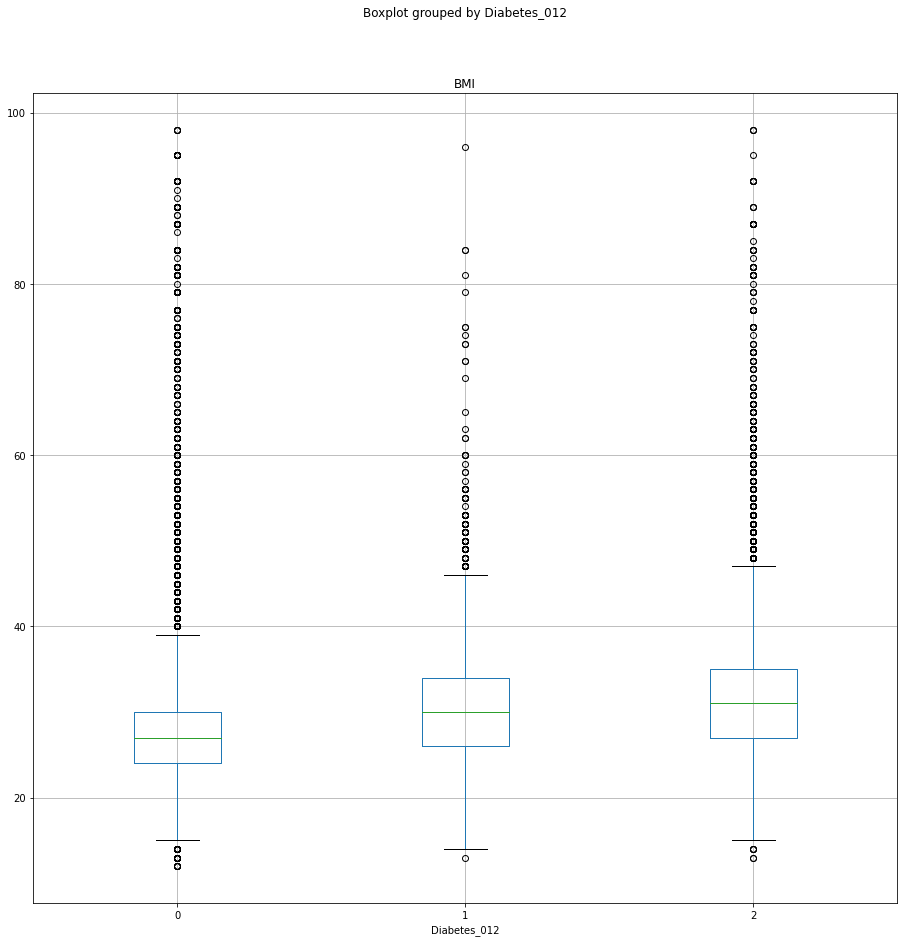

In [13]:
# Generating the Boxplot for the BMI and Diabetes_012

diabetes_dfCopy.boxplot("BMI", by="Diabetes_012", figsize=(15,15))
plt.show()

Given the boxplot above, we see can the BMI values of those who are not diabetic, prediabetic, and diabetic. From this, the boxplot shows us that those who are not diabtec have lower BMI values compared to those who are prediabetic and diabetic. Furthermore, we can see from the boxplot that there are so many extreme values from each categories. We note that these values are not outliers since it is possible  for an individual to have to have a high BMI but doesn't have a diabetes. It is also possible that a person's with low BMI has a diabetes. To have a much more clearer view we take a look at the summary of statistics.

In [24]:
# Generating the Summary Statistics for the BMI and Diabetes_012

diabetes_BMI_summary_stat = diabetes_dfCopy.groupby("Diabetes_012").agg({"BMI": ["mean", "median", "std", len]})
diabetes_BMI_summary_stat

BMI                         
                   mean median       std     len
Diabetes_012                                    
0             27.742521     27  6.260993  213703
1             30.724466     30  6.964898    4631
2             31.944011     31  7.363401   35346

As we can see from the summary statisitcs, people with diabetes has the highest average of BMI followed by people with prediabetes. Moreover, since the mean and median is almost equal the distribution for the data is almost normally distributed (no skewness). With these, we see that people with higher BMI tends to be more prone in having diabetes. But we can't still answer our first question *"Does people with high BMI count have a greater probability to have diabetes?"* since we don't know if the difference is statistically significant. A hypthesis testing is necessary in order to answer this. With this, we came up our first research question **Is there a difference with the BMI of those that are diabetic to those who are not diabetic?**

## 3.2. The income of individuals in relation to their diabetic status.

Our next question *"Does a person's income have a relation to their diabetic status?"* focuses on the relationship between an individuals Income (`Income`) and their Diabetic Status (`Diabetes`). For this analysis, the researchers want to determine if there is any sign that diabetes, or the lack thereof, is related to the income of a person. To visualize this, the researchers will use a histogram that depicts the count of those that have diabetes, prediabetes, and nodiabetes, organized in relation to their income.

In [15]:
# Creating an array of individual's income for each category

without_diabetes_income = diabetes_dfCopy[diabetes_dfCopy["Diabetes_012"]==0]["Income"].to_numpy()
with_prediabetes_income = diabetes_dfCopy[diabetes_dfCopy["Diabetes_012"]==1]["Income"].to_numpy()
with_diabetes_income = diabetes_dfCopy[diabetes_dfCopy["Diabetes_012"]==2]["Income"].to_numpy()

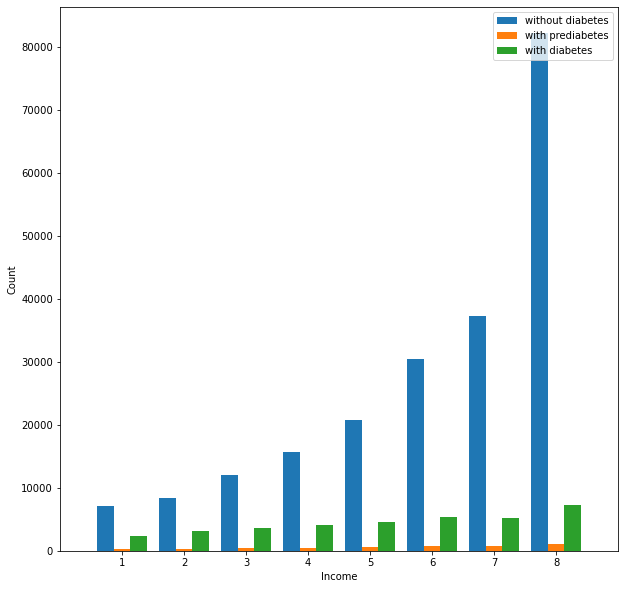

In [16]:
# Generating a side by side histogram for the three groups

plt.figure(figsize=(10,10))
plt.hist([without_diabetes_income, with_prediabetes_income, with_diabetes_income],bins=range(1,10), align="left", label=["without diabetes", "with prediabetes", "with diabetes"])
plt.xticks(range(1,9))
plt.xlim([0, 9])
plt.legend(loc='upper right')
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

From the histogram above, people without diabetes has the highest count in all the income scale followed by with diabetes and lastly with prediabetes. Moreover, the increases in the number of people without diabetes became relavitely large as the income increases (the income scale they belong). In both with prediabetes and with diabetes, the increase is relatively small compare to without diabetes. To make a further analysis, a contigency table was needed (i.e. a new dataframe focusing on the two variables `Income` and `Diabetes_012`). 

To do this, we count the number of individuals in each income scale (`Income`) for each diabetic status (`Diabetes_012`). 

In [17]:
# Counting number of individuals in each income scale for each Diabetic Status.

diabetes_counts = diabetes_dfCopy.groupby("Diabetes_012")["Income"].value_counts()
diabetes_counts

Diabetes_012  Income
0             8         82179
              7         37219
              6         30431
              5         20792
              4         15622
              3         12005
              2          8341
              1          7114
1             8          1011
              6           748
              7           735
              5           587
              4           459
              3           421
              2           356
              1           314
2             8          7195
              6          5291
              7          5265
              5          4504
              4          4054
              3          3568
              2          3086
              1          2383
Name: Income, dtype: int64

Looking at the data above, generally people having higher income is more susceptible from having diabetes. To have a much clearer view we convert this counts into a table as shown below. 

In [18]:
# Creating a dataframe from the diabetes_counts

diabetes_table = pd.DataFrame([diabetes_counts[0], diabetes_counts[1], diabetes_counts[2]], index=["without diabetes", "prediabetes", "with diabetes"]).transpose()
diabetes_table

,without diabetes,prediabetes,with diabetes
Income,,,
1,7114,314,2383
2,8341,356,3086
3,12005,421,3568
4,15622,459,4054
5,20792,587,4504
6,30431,748,5291
7,37219,735,5265
8,82179,1011,7195


In the table above, it is much clearer that the increase in the number of people without diabetes becames larger as their income increases. The speed of the increases somehow follows an exponential equation. The increase in the other two categories is not that much high as the income scale increases. But this table still doesn't answer our question *"Does a person's income have a relation to their diabetic status?"*. In order to determine if there really is a difference between the groups a statistical inference is needed.

## 3.3. The physical activity of an individual in relation to their diabtic status.

For the final interesting question *"What is the relation of a person's physical activity to their diabetic status?"*, which focus on the relationship between an individuals Physical Activity (`PhysActivity`) and their Diabetic Status (`Diabetes`). A histogram was first generated that depicts the count of those that have diabetes, prediabetes, and nodiabetes, organized in relation to their physical activity to have a clear picture of the distribution. 

In [19]:
# Creating an array of individual's physical activity for each category

without_diabetes_genhlth = diabetes_dfCopy[diabetes_dfCopy["Diabetes_012"]==0]["PhysActivity"].to_numpy()
with_prediabetes_genhlth = diabetes_dfCopy[diabetes_dfCopy["Diabetes_012"]==1]["PhysActivity"].to_numpy()
with_diabetes_genhlth = diabetes_dfCopy[diabetes_dfCopy["Diabetes_012"]==2]["PhysActivity"].to_numpy()

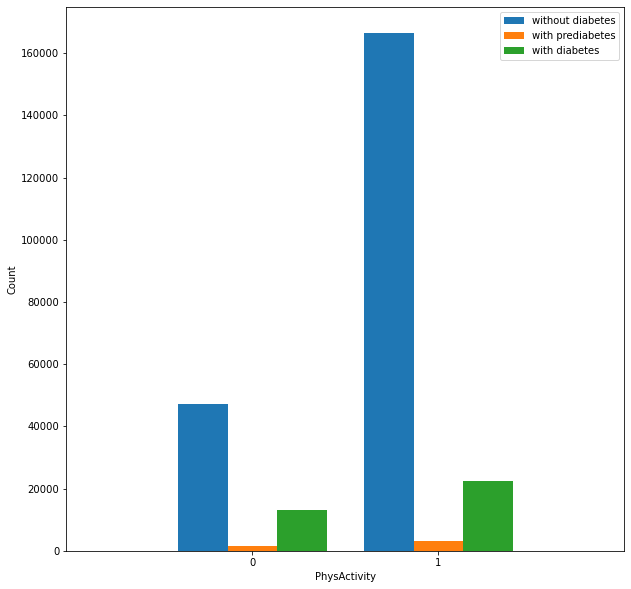

In [20]:
# Generating a side by side histogram for the three groups

plt.figure(figsize=(10,10))
plt.hist([without_diabetes_genhlth, with_prediabetes_genhlth, with_diabetes_genhlth],bins=range(-1,3), align="left", label=["without diabetes", "with prediabetes", "with diabetes"])
plt.xticks(range(0,2))
plt.xlim([-1, 2])
plt.legend(loc='upper right')
plt.xlabel("PhysActivity")
plt.ylabel("Count")
plt.show()

As seen from the histograph above, those without diabetes has the highest count in both with and without physical activity, followed by those with diabetes, and finally those with prediabets. The graphs only tells us that there are more physical active individual that have no diabetes but we can't assume if physical activity and diabetic status are dependent or independent with each other. Let's look at the contigency table to see if we can further make some analysis.

In [21]:
# Counting number of individuals who undergone physical activity and not for each Diabetic Status.

diabetes_physact_counts = diabetes_dfCopy.groupby("Diabetes_012")["PhysActivity"].value_counts()
diabetes_physact_counts

Diabetes_012  PhysActivity
0             1               166491
              0                47212
1             1                 3142
              0                 1489
2             1                22287
              0                13059
Name: PhysActivity, dtype: int64

In [41]:
# Creating a dataframe from the diabetes_physact_counts

diabetes_physact_table = pd.DataFrame([diabetes_physact_counts[0], diabetes_physact_counts[1], diabetes_physact_counts[2]], index=["without diabetes", "prediabetes", "with diabetes"]).transpose()
diabetes_physact_table

,without diabetes,prediabetes,with diabetes
PhysActivity,,,
1,166491,3142,22287
0,47212,1489,13059


We can clearly see that being physical active has a higher chance of being without diabetes. But the table alone can't tell us if these two variables are dependent. Thus, we need to perform hypthosis testing. This resulted to our 2nd Research Question. **Is there a relationship between a person's physical activity and diabetic status?**

# 4. Research Questions & Statistical Inference

**Research Questions**
1. Is there a significant difference between the BMI of those that are diabetic to those who are not diabetic?
2. Is there a relationship between a person's physical activity and diabetic status?


**Importance and significance of the Reasearch Questions**
1. From the [recent fact sheet of WHO](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight), 1.9 billion adults were considered overwieght and 650 million from these were considered obese. The number is almost tripled from the record in the year 1975. The number of obese and overweight adults continues to grow. Since obesity is preventable it is important to know if there's a signifianct difference between a person's BMI with respect to their diabetic status. This could help us in preventing and lowering the increasing number of diabetic person.

2. Another [fact sheet report made by WHO](https://www.who.int/news-room/fact-sheets/detail/physical-activity) shows that on the year 2016, about 28% of adults do not meet the global recommendation of physical activity per week. Moreover, with the pandemic going it is much harder to become physicaly active with all this restrictions. Knowing the relationship between a person's physical activty and diabetic status might emphaize the importance of being more physicaly active. 

# 4.1. Statistical Inference For Research Question 1
This portion, would show the hypthosis testing done in order the first research question *"Is there a significant difference with the BMI of those that are diabetic to those who are not diabetic?"*. 

There are 3 groups - without diabetes, prediabetes and with diabetes. We decided to only consider without diabetes and with diabetes since prediabetes are individuals with higher than normal but not high enough to be diagnosed with diabetes. We decided to remove this to focus more on people who are diagnosed with and without diabetes. 

With this, we first look at the summary statistics we generate in *3.1. The BMI count of individuals in relation to their diabetic status*.

In [25]:
# Summary Statistics from 3.1. The BMI count of individuals in relation to their diabetic status.

diabetes_BMI_summary_stat

BMI                         
                   mean median       std     len
Diabetes_012                                    
0             27.742521     27  6.260993  213703
1             30.724466     30  6.964898    4631
2             31.944011     31  7.363401   35346

Since we will only consider individuals that are diagnosed with and without diabetes we need to compute our final sample size. The final sample size is:

In [33]:
# Computing for final sample size

non_diabetic_size = diabetes_BMI_summary_stat.loc[0].loc["BMI"].loc["len"]
diabetic_size = diabetes_BMI_summary_stat.loc[2].loc["BMI"].loc["len"]

final_sample_size = non_diabetic_size + diabetic_size
print(final_sample_size)

249049.0


From our sample we can compute the difference in the means between the two groups (without diabetes and with diabetes). The difference between the means is: 

In [27]:
non_diabetic_mean = diabetes_BMI_summary_stat.loc[0].loc["BMI"].loc["mean"]
diabetic_mean = diabetes_BMI_summary_stat.loc[2].loc["BMI"].loc["mean"]

diff = non_diabetic_mean - diabetic_mean
print('{:.2f}'.format(diff))

-4.20


Next, we set up our hypthoses.

$H_0$ (null hypothesis): The true difference between the two groups is 0.

$H_A$ (alternative hypothesis): The true difference between the two groups is not 0.

We will be using t-test for hypothesis testing. Since our sample is randomly selected and independent and since our final sample size is 249049 (sufficiently large enough) then we can assume that are data is normally distributed using CLT. We, can now then proceed to testing. We will be setting the parameter `equal_var` to `False` since we can't assume that the population has equal variances.

In [34]:
# Perfomring T-test

ttest_ind(diabetes_df[diabetes_df["Diabetes_012"] == 0.0]["BMI"],
          diabetes_df[diabetes_df["Diabetes_012"] == 2.0]["BMI"],
          equal_var = False)

Ttest_indResult(statistic=-101.38352359927993, pvalue=0.0)

Since the $p$-value = 0.0, is less than the 0.05, we then reject the null hypothesis. Therefore, we can conclude based on the $p$-value under a 5% significance level that there is a significant difference between the BMI of people who are diabetic and people who are non-diabetic. 

# 4.2 Statistical Inference For Research Question 2
For this research question, we would like to find out Is there a relationship between a person's physical activity and diabetic status. 

Again, there are 3 groups - without diabetes, prediabetes and with diabetes. We decided to only consider without diabetes and with diabetes since prediabetes are individuals with higher than normal but not high enough to be diagnosed with diabetes. We decided to remove this to focus more on people who are diagnosed with and without diabetes. 

In [42]:
# Table from 3.3. The physical activity of an individual in relation to their diabtic status.

diabetes_physact_table

,without diabetes,prediabetes,with diabetes
PhysActivity,,,
1,166491,3142,22287
0,47212,1489,13059


In [43]:
# Dropping the column for prediabetes

diabetes_physact_table.drop(['prediabetes'], axis='columns', inplace=True)
diabetes_physact_table

,without diabetes,with diabetes
PhysActivity,,
1,166491,22287
0,47212,13059


Next, we set up our hypthoses.

$H_0$ (null hypothesis): There is no significant difference between the distribution of the two groups.

$H_A$ (alternative hypothesis): There is a significant difference between the distribution of the two groups.

We will be using chi-square for testing to determine if there is a difference between the distribution of the two groups.

In [44]:
# Perfomring Chi-square

chi2_contingency(diabetes_physact_table)

(3647.1812283220806,
 0.0,
 1,
 array([[161985.89407707,  26792.10592293],
        [ 51717.10592293,   8553.89407707]]))

Since the $p$-value = 0.0, is less than the 0.05, we then reject the null hypothesis. Therefore, we can conclude based on the $p$-value under a 5% significance level that there is a significant difference between the the distribution of the two groups. 

# 5. Conclusion and Insights

This portion includes our conclusion and insights from the statistical inference we did in the previous part.

**For Statistical Inference 1**

- From *4.1. Statistical Inference for Research Question 1* we concluded that there is a significant difference between the BMI of people who are diabetic and people who are non-diabetic. Thus, having a high BMI might increase the risk for diabetes. 

**For Statistical Inference 2**

- From *4.2. Statistical Inference for Research Question 2* we concluded that there is a significant difference between distribution of the two groups. Thus, being a physical active could affect your diabetic status. Not physically active individuals are at more risk in being diagnoes with diabetes.